# 1🚴‍♂️ Bike Sales Analysis
Exploring Sales Across Countries and States

**📌 1. Importing Necessary Libraries
We start by importing essential libraries for data analysis, visualization, and modeling.

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# 📂 2. Loading the Dataset
We'll load the dataset and inspect its first few rows.

In [278]:
data=("C:\\Users\HP\\Desktop\\BIKE SALES ANALYSIS.xlsx")
df= pd.read_excel(data)
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# 3. Data Cleaning and Preprocessing
Before analysis, we check for missing values and duplicates.

In [207]:
print(f"Missing values:{df.isnull().sum().value_counts()}")
print(f"Duplicated Values:{df.duplicated().sum()}")

Missing values:0    19
Name: count, dtype: int64
Duplicated Values:0


In [461]:
def CateAge(age):
    if age < 25:
        return "Youth (<25)"
    elif age >25 and age <35:
        return "Youth Adults (25-34)"
    elif age >35 and age <65:
        return "Adults (35-64)"
    else :
        return "Senior (65+)"
df["Age_group"]=df["Customer_Age"].map(CateAge)

In [462]:
df.drop("Age_Group",axis=1)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_group,Profit_Prediction
0,2013-11-26,26,November,2013,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Youth (<25),590.00
1,2015-11-26,26,November,2015,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Youth (<25),590.00
2,2014-03-23,23,March,2014,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Adults (35-64),1369.97
3,2016-03-23,23,March,2016,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Adults (35-64),1082.14
4,2014-05-15,15,May,2014,47,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,Adults (35-64),238.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112031,2016-04-12,12,April,2016,41,M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,Adults (35-64),112.00
112032,2014-04-02,2,April,2014,18,M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,Youth (<25),655.19
112033,2016-04-02,2,April,2016,18,M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,Youth (<25),655.19
112034,2014-03-04,4,March,2014,37,F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,Adults (35-64),685.99


# 4. Total Sales by Country

Here, we visualize total sales across different countries.

In [8]:
sbc= df.groupby("Country")["Revenue"].sum().reset_index(name="Revenue")
sbc.sort_values(by="Revenue",inplace=True,ascending=False)
sbc.reset_index(drop=True,inplace=True)
sbc.head()

,Country,Revenue
0,United States,27777098
1,Australia,21196395
2,United Kingdom,10575628
3,Germany,8956724
4,France,8414745


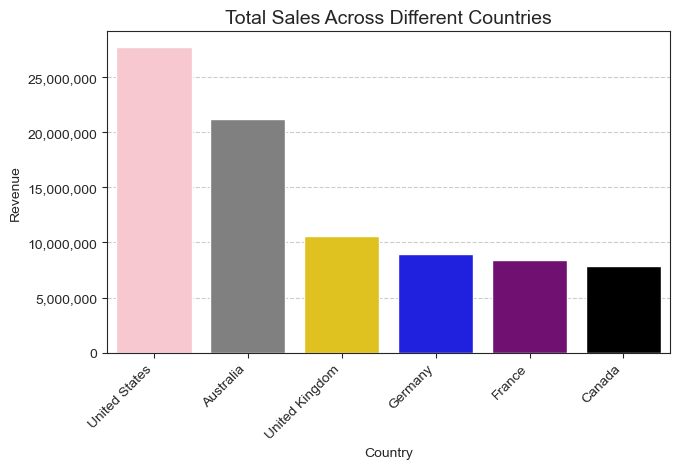

In [215]:
#Total Sales by Countries
ax=sns.barplot(y="Revenue",x="Country",data=sbc,palette=["pink","gray","gold","blue","purple","black"],hue="Country")
plt.title("Total Sales Across Different Countries",fontsize=14)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
plt.grid(axis="y",linestyle="--")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Insight:
.  The country with the highest sales is United States, while Canada has the lowest.

. Further analysis can explore sales distribution within each country.



# 5  Total Revenue by Country


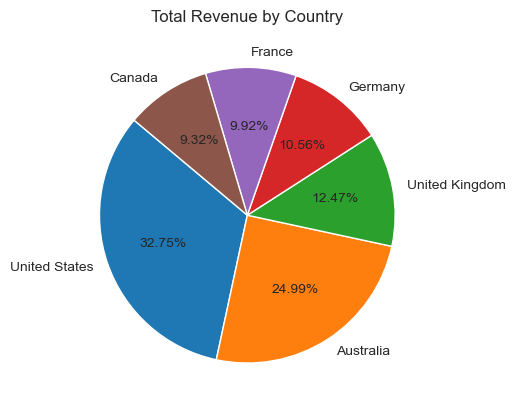

In [422]:
plt.pie(sbc["Revenue"],labels= sbc["Country"],autopct="%1.2f%%",startangle=140)
plt.title("Total Revenue by Country")
plt.show()

# Insight from the Pie Chart: Total Revenue by Country

1. United States Dominates Revenue (32.75%)
      The U.S. generates the highest revenue, significantly leading other countries.
      Indicates a strong market presence and demand.

2. Australia is the Second-Largest Market (24.99%)
      Considerable revenue contribution, making it another key market.

3. United Kingdom & Germany (12.47% & 10.56%)
      Moderate revenue contributions, potential for growth.

4. Canada & France (9.32% & 9.92%)
      Lowest revenue contributors, possible underperformance or smaller market size.

**Suggestions:
1. Focus on maintaining & expanding in the U.S. and Australia.
2. Explore strategies to boost sales in Canada and France.
3. Assess factors contributing to the U.S.'s strong performance and apply them to weaker regions.



# 6. Sales Distribution by State (USA, Canada, UK and Others)

Now, we analyze sales at the state level for each major country.

In [218]:
usa_rev= df[df["Country"]=="United States"]
canada_rev= df[df["Country"]=="Canada"]
uk_rev= df[df["Country"]=="United Kingdom"]
aus_rev=df[df["Country"]=="Australia"]
germ_rev=df[df["Country"]=="Germany"]
france_rev= df[df["Country"]=="France"]

In [219]:
usa_Rev= usa_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
usa_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
usa_Rev.reset_index(drop=True,inplace=True)
usa_Rev.head(22)



,State,Revenue
0,California,17529787
1,Washington,6701258
2,Oregon,3435046
3,Wyoming,21973
4,Illinois,20141
5,Florida,11014
6,Ohio,9747
7,Arizona,9379
8,Texas,6835
9,New York,5257


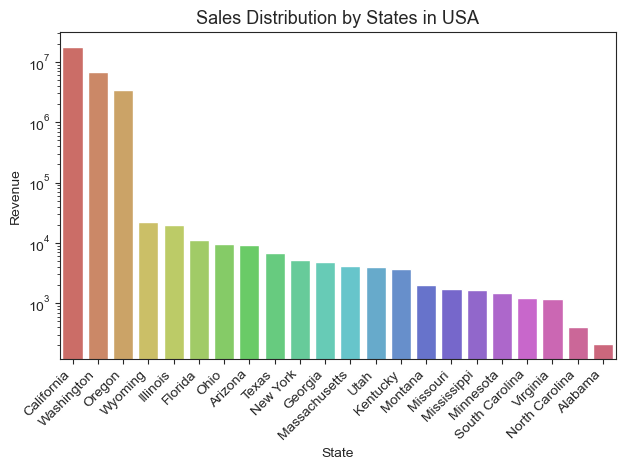

In [230]:
num_bars=22
palette=sns.color_palette("hls",num_bars)
sns.barplot(y="Revenue",x="State",data=usa_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in USA",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
plt.yscale("log")
plt.show()

# Insight:
The highest revenue-generating state in the USA is California.

This could be due to higher population density or a higher number of bike stores.



In [222]:
#For CANADA

canada_Rev= canada_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
canada_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
canada_Rev.reset_index(drop=True,inplace=True)
canada_Rev.head(10)


,State,Revenue
0,British Columbia,7848334
1,Alberta,56803
2,Ontario,1045


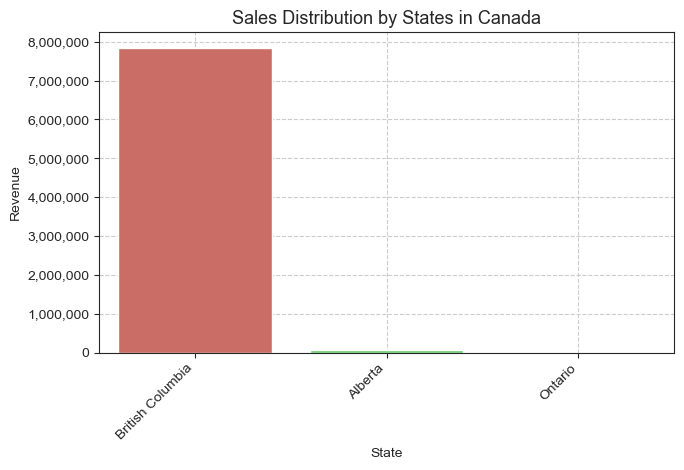

In [231]:
num_bars=3
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=canada_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in Canada",fontsize=13)
plt.xticks(rotation=45,ha="right")
plt.grid(linestyle="--")
sns.set_style("ticks")
plt.tight_layout()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight:

1. The highest revenue-generating state in the Canada is British Columbia.

2. This could be due to higher population density or a higher number of bike stores aswell .

In [226]:
#For UK
uk_Rev= uk_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
uk_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
uk_Rev.reset_index(drop=True,inplace=True)
uk_Rev.head(10)



,State,Revenue
0,England,10575628


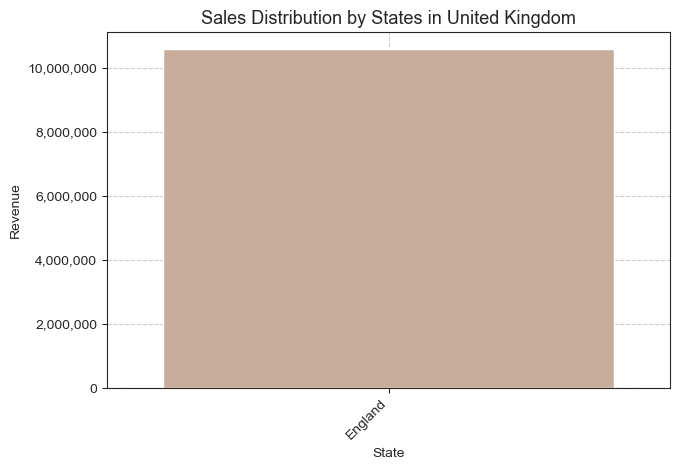

In [232]:
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=uk_Rev,palette="pink",hue="State")
plt.title("Sales Distribution by States in United Kingdom",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.grid(linestyle="--")
plt.tight_layout()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight:

1. England accounts for 100% of sales in the UK since it's the only listed state.

In [235]:
#For Australia
aus_Rev= aus_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
aus_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
aus_Rev.reset_index(drop=True,inplace=True)
aus_Rev.head(10)



,State,Revenue
0,New South Wales,9125980
1,Queensland,5055843
2,Victoria,5038294
3,South Australia,1396139
4,Tasmania,580139


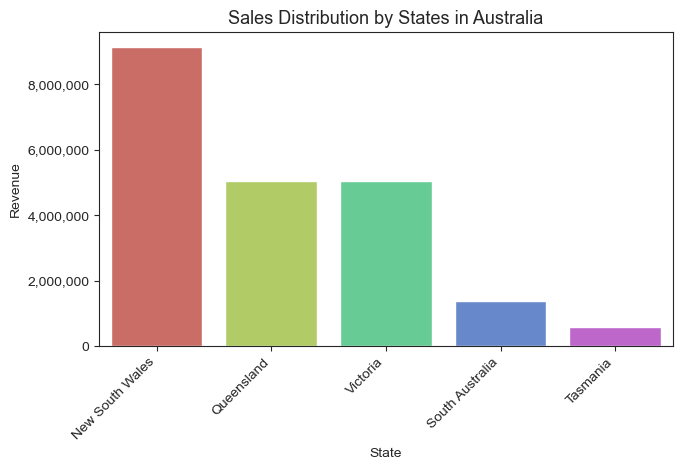

In [236]:
num_bars=5
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=aus_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in Australia",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight:

The highest revenue-generating state in the Australia is New South Wales.


In [237]:
#For Germany
germ_Rev= germ_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
germ_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
germ_Rev.reset_index(drop=True,inplace=True)
germ_Rev.head(10)



,State,Revenue
0,Hessen,2067980
1,Saarland,2026497
2,Nordrhein-Westfalen,1803855
3,Hamburg,1550469
4,Bayern,1338181
5,Brandenburg,169742


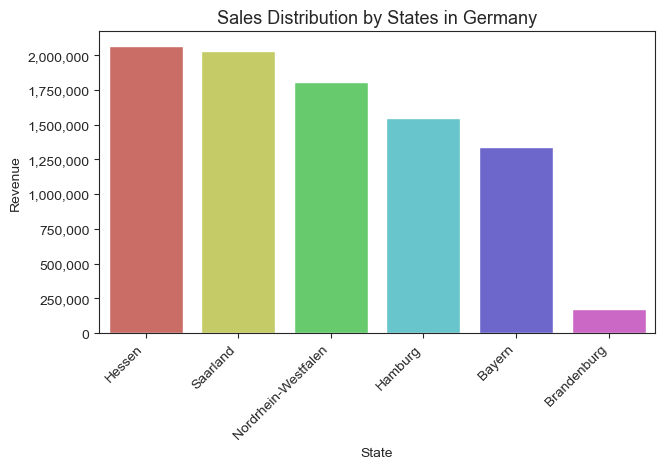

In [241]:
num_bars=6
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=germ_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in Germany",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
#plt.yscale("log")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight:

1. HESSEN generates the highest revenue in Germany.
2. SAARLAND ranks second in sales while the gap between Saarland and Hessen is very close.
3. BRANDENBURG has the lowest revenue, which may indicate lower demand or fewer bike stores.



In [239]:
#For France
france_Rev= france_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
france_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
france_Rev.reset_index(drop=True,inplace=True)
france_Rev.head(20)



,State,Revenue
0,Seine (Paris),1642370
1,Nord,1319127
2,Seine Saint Denis,1126738
3,Essonne,972701
4,Hauts de Seine,935836
5,Yveline,688924
6,Seine et Marne,372243
7,Loiret,325081
8,Moselle,266124
9,Garonne (Haute),183412


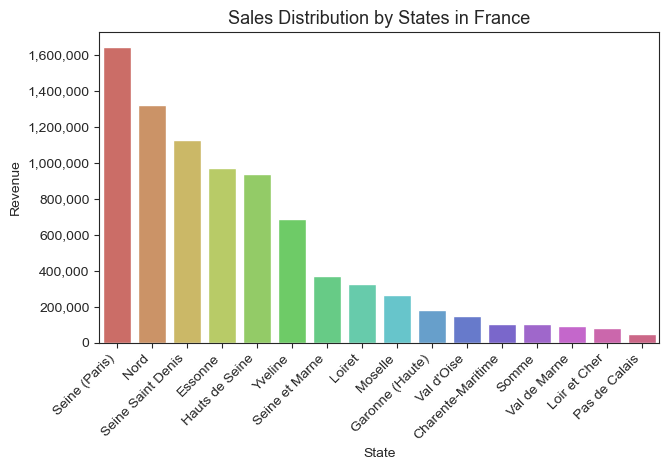

In [242]:
num_bars=16
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=france_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in France",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
#plt.yscale("log")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight:

1. SEINE generates the highest revenue.
2. PAS DE CALAIS has the lowest revenue.

Note: The reason for sales differences could be regional demand, population density, or store locations.



# 7. Revenue Distribution by Gender


Let's see how sales differ between male and female customers.

In [244]:
totalRevByGender=df.groupby("Customer_Gender")["Revenue"].sum().reset_index()
totalRevByGender.sort_values(by="Customer_Gender",ascending=False)
totalRevByGender.reset_index(inplace=True,drop=True)
totalRevByGender.head()

,Customer_Gender,Revenue
0,F,41694689
1,M,43132083


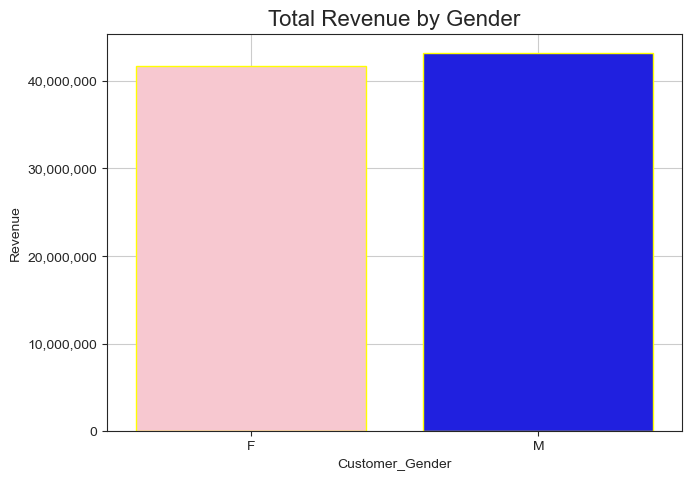

In [246]:
plot=sns.barplot(data=totalRevByGender,x="Customer_Gender",y="Revenue",palette=["pink","Blue"],hue="Customer_Gender",estimator=sum,edgecolor="yellow")
plt.tight_layout()
plt.title("Total Revenue by Gender",fontsize=16)
sns.set_style("ticks")
plt.grid()
plot.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


# Insight:

1. Sales distribution for Male Clients appears slightly higher than Female customers.

Although Further investigation could explore product preferences by gender.



# 8. Revenue by Gender Across All Countries

To analyze sales by gender in each country, we use a grouped bar chart:

In [247]:
revByGender =df.groupby(["Customer_Gender","Country"])["Revenue"].sum().reset_index()
revByGender.sort_values(by="Revenue",ascending=False)
revByGender.reset_index(drop=True,inplace=False)

,Customer_Gender,Country,Revenue
0,F,Australia,10793938
1,F,Canada,3649643
2,F,France,4004075
3,F,Germany,4709921
4,F,United Kingdom,5257108
5,F,United States,13280004
6,M,Australia,10402457
7,M,Canada,4256539
8,M,France,4410670
9,M,Germany,4246803


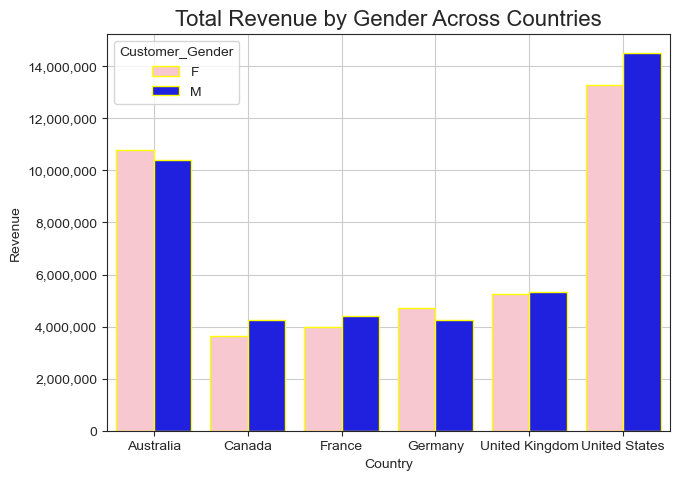

In [248]:
ax=sns.barplot(data=revByGender,x="Country",y="Revenue",palette=["pink","blue"],hue="Customer_Gender",estimator=sum,edgecolor="yellow")
plt.tight_layout()
plt.title("Total Revenue by Gender Across Countries",fontsize=16)
sns.set_style("ticks")
plt.grid()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Insight:

1. In most countries, male customers generate higher revenue than females.

2. However, in Australia,Germany and United kingdom, female customers outperform males in spending.


Note: This insight could help target marketing strategies based on gender preferences.

# 9. Total Revenue by Age Group

Instead of analyzing individual ages, we group customers into age brackets ( 18-24, 25-34, etc.).

In [305]:
RevByAgeG=df.groupby("Age_group")["Revenue"].sum().reset_index()
RevByAgeG.sort_values(by="Revenue",ascending=False)
RevByAgeG.reset_index(drop=True,inplace=False)

,Age_group,Revenue
0,Adults (35-64),39138249
1,Senior (65+),6045424
2,Youth (<25),11685489
3,Youth Adults (25-34),27957610


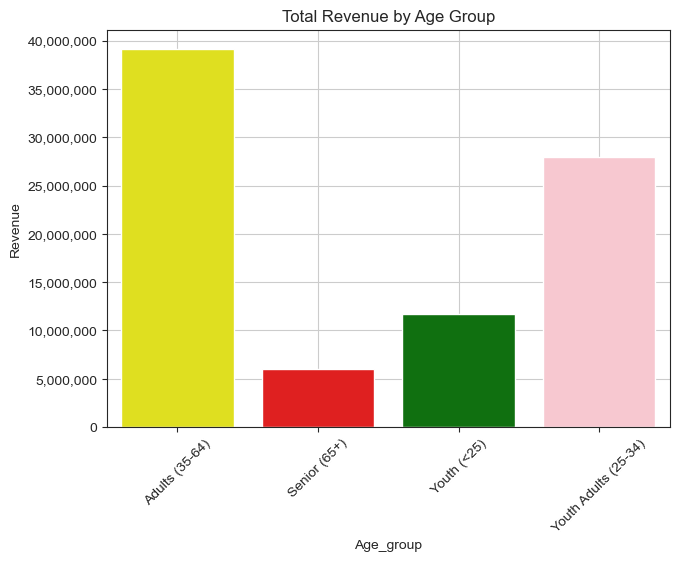

In [306]:
ax=sns.barplot(x="Age_group",y="Revenue",data=RevByAgeG,palette=["yellow","red","green","pink"],estimator=sum,hue="Age_group")
plt.tight_layout()
plt.title("Total Revenue by Age Group")
plt.xticks(rotation=45)
plt.grid()

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight: Revenue by Age Group
    
1. The 35-64 age group generates the highest revenue, indicating that middle-aged individuals are the biggest buyers.
 
2. The 25-34 age group (Young Adults) follows closely behind in revenue contribution.
 
3. Customers aged below 25 contribute moderate revenue, ranking third.
 
4. The 65+ age group (Seniors) generates the lowest revenue, suggesting a declining interest in biking or premium products among older customers.

**Suggestion:

1. Marketing strategies should prioritize customers aged 35-64 and Young Adults (25-34) as they drive the most sales.
 
2. Then Consider offering special promotions or budget-friendly options for the 65+ group to encourage more engagement.



# 10. Revenue by Age Group Across Countries

Instead of analyzing individual ages, i group customers into age brackets (<25, 25-34, 35-64, 65+).

In [301]:
totalRevByAgeG=df.groupby(["Age_group","Country"])["Revenue"].sum().reset_index()
totalRevByAgeG.sort_values(by="Revenue",ascending=False)
totalRevByAgeG.reset_index(drop=True,inplace=False)

,Age_group,Country,Revenue
0,Adults (35-64),Australia,8307516
1,Adults (35-64),Canada,4142299
2,Adults (35-64),France,3238522
3,Adults (35-64),Germany,3894477
4,Adults (35-64),United Kingdom,4862557
5,Adults (35-64),United States,14692878
6,Senior (65+),Australia,1700977
7,Senior (65+),Canada,610270
8,Senior (65+),France,661052
9,Senior (65+),Germany,661346


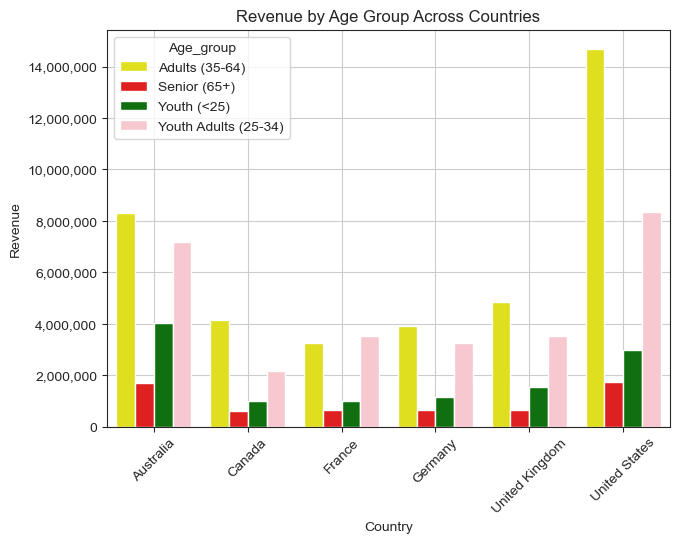

In [304]:
ax=sns.barplot(x="Country",y="Revenue",data=totalRevByAgeG,palette=["yellow","red","green","pink"],estimator=sum,hue="Age_group")
plt.tight_layout()
plt.title("Revenue by Age Group Across Countries")
plt.xticks(rotation=45)
plt.grid()

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight:

1. In Australia , Canada,Germany,United Kingdom and United states, Adult customers (35-64 years old) spend the most.

2. While in France Young Adults (25-34 Years old ) Contribute more revenue


**Understanding age-based spending habits can improve regional marketing strategies.



# 11. Sales Distribution by Product Category

Let's see which product category sells the most

In [43]:
revByProduct=df.groupby("Product_Category")["Revenue"].sum().reset_index()
revByProduct.sort_values(by="Revenue",inplace=True,ascending=False)
revByProduct.reset_index(drop=True,inplace=True)
revByProduct.head()

,Product_Category,Revenue
0,Bikes,61434484
1,Accessories,15022766
2,Clothing,8369522


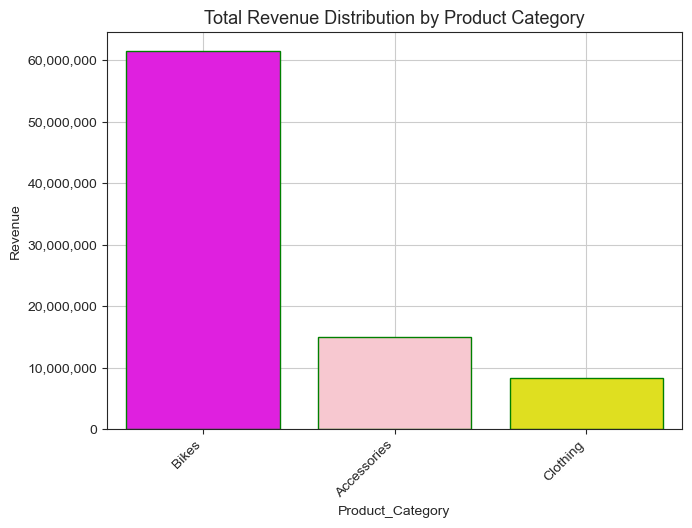

In [44]:
ax=sns.barplot(data=revByProduct,x="Product_Category",y="Revenue",palette=["Magenta","pink","yellow"],hue="Product_Category",edgecolor="green")
plt.tight_layout()
plt.title("Total Revenue Distribution by Product Category",fontsize=13)
sns.set_style("ticks")
plt.grid()
plt.xticks(rotation=45,ha="right")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight: Sales Distribution by Product Category

1. Bikes generate more than 70% of total Revenue, making them the dominant revenue driver.
2. Accessories follow, but there is a significant gap between them and bikes.
3. Clothing ranks the lowest, contributing the least to overall sales.

**Suggestion:
1. The company should prioritize bike sales strategies since they drive the majority of revenue.
2. Accessory sales can be boosted through bundle deals with bikes to increase their contribution.
3. Clothing needs better promotion, possibly through discounts, sponsorships, or targeted advertising.

# 12. Revenue Distribution by Product Category Across Countries

In [27]:
revByProductByC=df.groupby(["Country","Product_Category"])["Revenue"].sum().reset_index()
revByProductByC.sort_values(by="Revenue",inplace=True,ascending=False)
revByProductByC.reset_index(drop=True,inplace=True)
revByProductByC.head(17)

,Country,Product_Category,Revenue
0,United States,Bikes,19409954
1,Australia,Bikes,16867194
2,United Kingdom,Bikes,7796471
3,Germany,Bikes,6781256
4,France,Bikes,6316991
5,United States,Accessories,5251088
6,Canada,Bikes,4262618
7,United States,Clothing,3116056
8,Australia,Accessories,2727399
9,Canada,Accessories,2265769


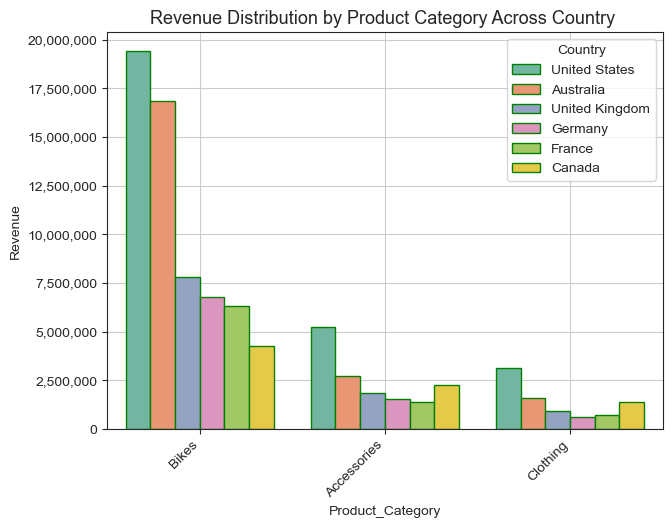

In [30]:
num_bars=6
palette=sns.color_palette("Set2",num_bars)
ax=sns.barplot(data=revByProductByC,x="Product_Category",y="Revenue",palette=palette,hue="Country",edgecolor="green")
plt.tight_layout()
plt.title("Revenue Distribution by Product Category Across Country ",fontsize=13)
sns.set_style("ticks")
plt.grid()
plt.xticks(rotation=45,ha="right")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Insight:
    
1. Bikes generate the highest revenue across all countries, with the United States leading, followed by Australia.

2. Accessories come second, but with a significant gap compared to bikes, indicating they contribute much less to total revenue.

3. Clothing generates the lowest revenue, suggesting either lower demand, lower pricing, or less focus on sales.

4. The United States consistently leads in revenue across all product categories, followed by Australia.

# 13. Top Selling Sub_Categories in Different Countries

In [33]:
revBysubProductByC=df.groupby(["Sub_Category","Country"])["Revenue"].sum().reset_index()
revBysubProductByC.sort_values(by="Revenue",inplace=True,ascending=False)
revBysubProductByC.reset_index(drop=True,inplace=True)
revBysubProductByC.head(17)

,Sub_Category,Country,Revenue
0,Road Bikes,Australia,10028843
1,Road Bikes,United States,9932721
2,Mountain Bikes,United States,7172345
3,Mountain Bikes,Australia,5395897
4,Road Bikes,United Kingdom,3697853
5,Road Bikes,Germany,3534513
6,Road Bikes,France,3457247
7,Mountain Bikes,United Kingdom,2773723
8,Road Bikes,Canada,2499531
9,Mountain Bikes,Germany,2328238


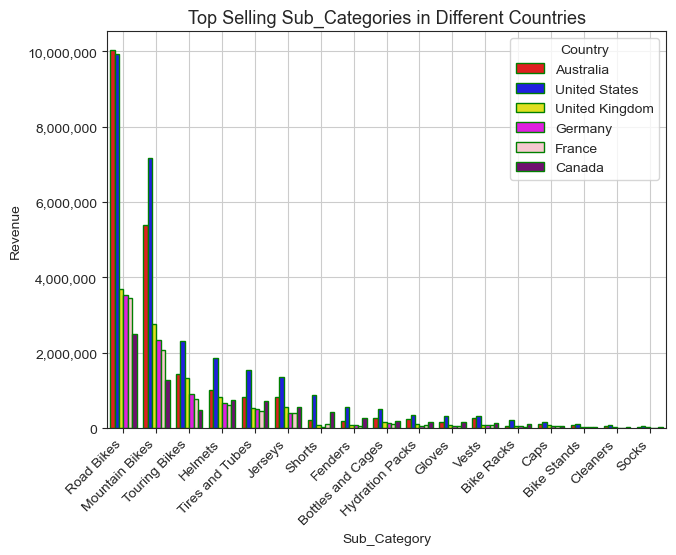

<Figure size 800x600 with 0 Axes>

In [41]:
num_bars=6
ax=sns.barplot(data=revBysubProductByC,x="Sub_Category",y="Revenue",palette=["Red","Blue","Yellow","Magenta","Pink","Purple"],hue="Country",edgecolor="green")
plt.tight_layout()
plt.title("Top Selling Sub_Categories in Different Countries",fontsize=13)
sns.set_style("ticks")
plt.grid()
plt.xticks(rotation=45,ha="right")
plt.figure(figsize=(8,6))

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Key Insights:
    
**1. Road Bikes Dominate Sales
        
     Road bikes generate the highest revenue across all countries.
     High demand for speed, efficiency, and performance drives sales.
     Countries with strong cycling culture (e.g., United States, United Kingdom, Australia) contribute significantly.

**2. Bikes Category is the Primary Revenue Driver

     The Bikes category outperforms Accessories and Clothing in total revenue and profit.
     While accessories and clothing are essential, they generate significantly lower sales volume.
     Strategy Insight: Bundling accessories (e.g., helmets, jerseys) with bike sales could increase revenue.

**3. Clothing Category Struggles alot

    Clothing products (jerseys, shorts, gloves, socks) contribute the least to revenue.
    Possible reasons:
    Consumers prioritize bikes and accessories over apparel.
    
    **Suggestion
    Try and offer seasonal discounts, athlete endorsements, or exclusive brand collaborations to drive sales.

    
**General Suggestion:

    1. Recommend buying helmets, tires,jerseys, and gloves for customers buying bikes.
    2. Implement a loyalty program offering discounts on accessories for returning customers.

#  14. Yearly Sales Count Trends:


In [403]:
orderQperYear= df.groupby("Year")["Order_Quantity"].sum().reset_index()
orderQperYear.sort_values(by="Order_Quantity",ascending=False)
orderQperYear.head()

,Year,Order_Quantity
0,2011,5254
1,2012,5328
2,2013,292144
3,2014,376231
4,2015,286897


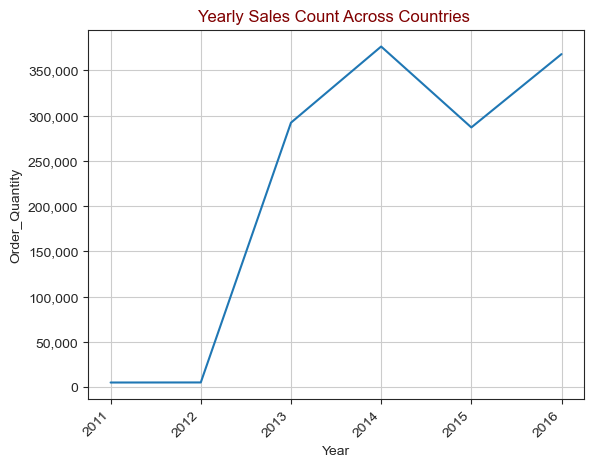

In [404]:
ax=sns.lineplot(data=orderQperYear,x="Year",y="Order_Quantity")
plt.grid()
plt.xticks(rotation=45,ha="right")
plt.title("Yearly Sales Count Across Countries ",color="Maroon")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


# Insights:

1. There was a huge increase in order quantity from 2012 to 2013, showing strong demand growth.

2. 2014 recorded the highest order quantity, but there was a slight decline in 2015.

3. Despite the drop in 2015, 2016 recovered well, reaching a new peak.

4. The 2012-2013 jump suggests a major boost in sales strategy, market expansion, or product demand.

5. The 2015 dip could be due to supply issues, price increases, or maybe even market saturation.

# 15. Total Number of Products Sold Per Country

I analyze how many products were sold in each country:

In [328]:
totalSoldperC= df.groupby("Country")["Order_Quantity"].sum().reset_index()
totalSoldperC.sort_values(by="Order_Quantity",ascending=False)
totalSoldperC.head()

,Country,Order_Quantity
0,Australia,261227
1,Canada,190202
2,France,127872
3,Germany,124755
4,United Kingdom,155769


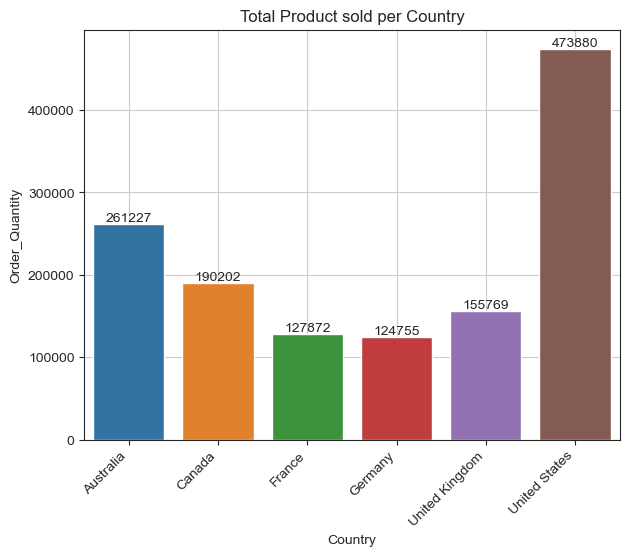

In [334]:
mb=sns.barplot(data=totalSoldperC,x="Country",y="Order_Quantity",hue="Country")
plt.tight_layout()
plt.xticks(rotation=45,ha="right")
plt.grid()
plt.title("Total Product sold per Country")
for bar in mb.containers:
    mb.bar_label(bar)
plt.show()

# **Insights:

1. USA leads in sales (473k), followed by Australia (261k)
2. Canada (190k) and the UK (156k) have moderate sales
3. France (127K+) and Germany (124k+) have the lowest sales

**The difference between the USA and other countries suggests a major market share in the USA, potentially due to higher demand, better distribution , or marketing effectiveness

# 16. Product Catergory Sales Count

In [327]:
totalSoldbyProduct= df.groupby("Product_Category")["Order_Quantity"].sum().reset_index()
totalSoldbyProduct.sort_values(by="Order_Quantity",ascending=False)
totalSoldbyProduct.head()

,Product_Category,Order_Quantity
0,Accessories,1042791
1,Bikes,36201
2,Clothing,254713


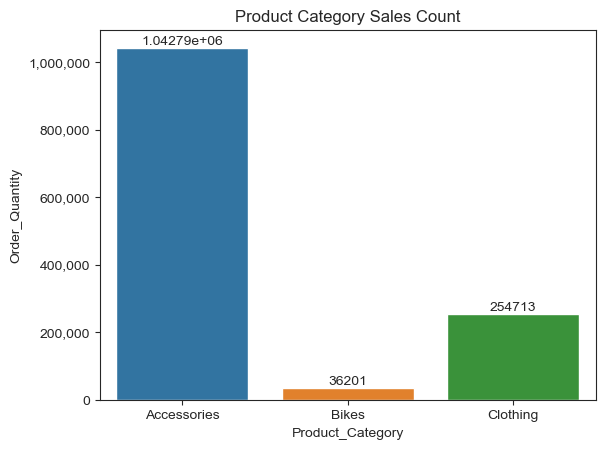

In [333]:
bar=sns.barplot(data=totalSoldbyProduct,x="Product_Category",y="Order_Quantity",hue="Product_Category")
plt.title("Product Category Sales Count")
for ba in bar.containers:
    bar.bar_label(ba)
bar.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()

**Insight 

1. Bike Accessories have the highest total units sold, significantly outpacing both clothing and bikes.
2. Clothing ranks second, though it lags behind accessories by a large margin.
3. Bikes have the lowest number of units sold, despite generating the highest revenue.

**Note:

1. Bike Accessories Sell the Most, but at a Lower Price Point
      * Accessories like helmets, locks, lights, and spare parts are essential for bikers, leading to frequent purchases.
        However, since these items are generally low-cost, they contribute less revenue per unit sold compared to bikes.


2. Clothing Sits in the Middle but Has Growth Potential
    * Clothing (e.g., biking jerseys, biking gloves) is bought more often than bikes but less than accessories.
    * But its revenue contribution is very low, possibly due to lower awareness or lack of strong marketing efforts.


3. Bikes Sell the Least but Generate the Most Revenue
    * Since bikes are high-cost, long-term investments, people don’t buy them as frequently as accessories.
    * But despite lower sales volume, bikes drive the majority of the company’s revenue due to their profits & higher price tags 


**Suggestion:
    
1. Encourage customers to buy accessories along with a bike purchase to maximize revenue.
2. Running targeted promotions on clothing could help boost clothing sales.
3. Loyalty Programs: Offering discounts on accessories for repeat customers may drive more purchases.

# 17. Profit by product Category

In [397]:
profitByProductCat=df.groupby("Product_Category")["Profit"].sum().reset_index()
profitByProductCat.sort_values(by="Profit",ascending=False)
profitByProductCat.reset_index(inplace=True,drop=True)
profitByProductCat.head(7)

,Product_Category,Profit
0,Accessories,8807194
1,Bikes,20399726
2,Clothing,2839319


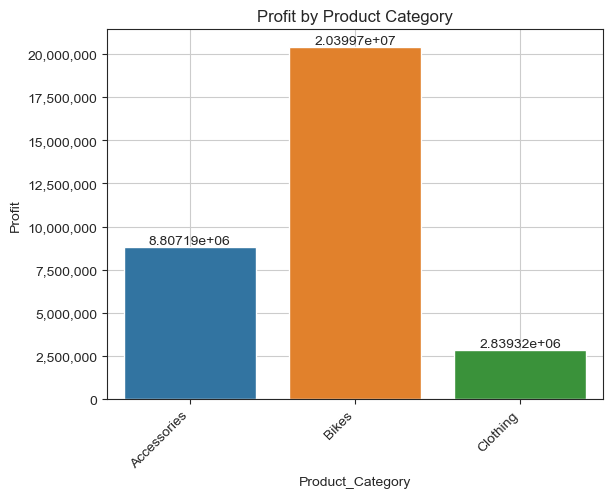

In [400]:
bar=sns.barplot(data=profitByProductCat,x="Product_Category",y="Profit",hue="Product_Category")
plt.title("Profit by Product Category")
plt.grid()
plt.xticks(rotation=45,ha="right")
for ba in bar.containers:
    bar.bar_label(ba)
bar.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()

# 📌 Insight:

1. Bikes dominate profit generation, bringing in over 20 million, making it the most profitable category.

2. Accessories come in second with a significant gap, generating around 8.8 million in profit.

3. Clothing records the lowest profit, with just 2.8 million, much lower than accessories and bikes.

4. The large profit margin for bikes suggests higher unit prices and better profitability.

5. Clothing’s low profit could be due to lower pricing, lower demand, or lower markup per unit.

# 18. Profits Trend Over the Years (2011 - 2016)

In [341]:
profitByYear=df.groupby("Year")["Profit"].sum().reset_index()
profitByYear.sort_values(by="Profit",ascending=False)
profitByYear.reset_index(inplace=True,drop=True)
profitByYear.head(6)

,Year,Profit
0,2011,2877185
1,2012,2938519
2,2013,5912432
3,2014,5818522
4,2015,7497361
5,2016,7002220


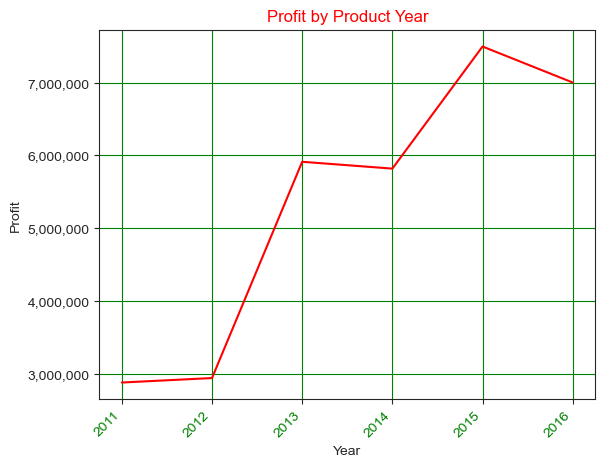

In [371]:
bar=sns.lineplot(data = profitByYear,x="Year",y="Profit",color="Red")
plt.title("Profit by Product Year",color="Red")
for ba in bar.containers:
    bar.bar_label(ba)
bar.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.grid(color="Green")
plt.xticks(rotation=45,ha="right",color="green")
plt.show()

# Insights:
    
1. Profits consistently increased each year, peaking in 2015, and that shows a strong sign of business expansion and efficiency. 
2. 2016 profits dropped slightly compared to 2015 but remained higher than all years before 2015.This could be due to increased    costs, pricing adjustments, or a shift in product demand.

**Note:

1. 2015 was the best year.
2. The decline in 2016 isn’t alarming atall , but understanding its cause can prevent further drops.

# 19. Profit Trends Across Countries (2011 - 2016)


In [358]:
salesByYearC=df.groupby(["Year","Country"])["Profit"].sum().reset_index()
salesByYearC.sort_values(by="Profit",ascending=False)
salesByYearC.reset_index(inplace=True,drop=True)
salesByYearC.head(6)

,Year,Country,Profit
0,2011,Australia,710091
1,2011,Canada,302594
2,2011,France,277373
3,2011,Germany,270488
4,2011,United Kingdom,303817
5,2011,United States,1012822


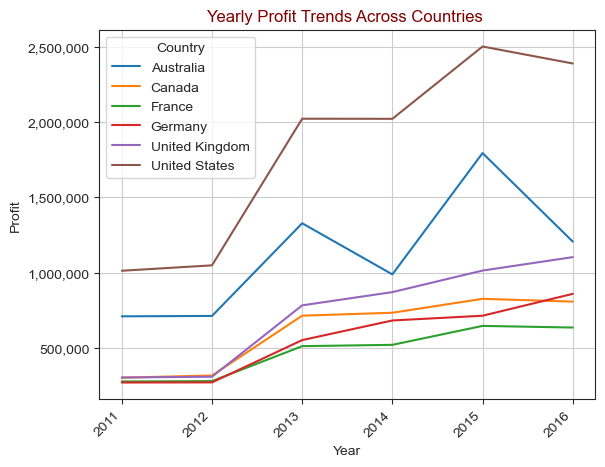

In [384]:
ax=sns.lineplot(data=salesByYearC,x="Year",y="Profit",hue="Country")
plt.grid()
plt.xticks(rotation=45,ha="right")
plt.title("Yearly Profit Trends Across Countries ",color="Maroon")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


# Insight: 

1. United States leads in profits
         The U.S. consistently had the highest profit, peaking in 2015 before slightly declining in 2016.
         This suggests strong market presence and product demand.

2. Australia saw rapid growth but fluctuated
    Significant profit increase from 2012 to 2015, with a sharp dip in 2016. Possible reasons might be market shifts,      reduced sales, or cost increases.

3. United Kingdom shows steady, stable growth
    Unlike others, the UK maintained consistent profit growth without major dips.
    This could indicate a balanced business strategy with fewer risks.

4. Canada, Germany, and France had moderate growth
        Their profits grew at a slower rate but showed consistent improvement.
        Canada stabilized in 2016, while Germany and France slightly surpassed it.


# Suggestion:

1. 2015 was a peak year for most countries, with 2016 showing some declines.
2. The U.S. and Australia had the biggest fluctuations, while the UK remained steady.



In [452]:
pr=df.groupby("Unit_Price")["Revenue"].sum().reset_index()
pr.sort_values(by="Revenue",ascending=False)
pr.reset_index(inplace=True,drop=True)
pr.head()

,Unit_Price,Revenue
0,2,279708
1,4,222782
2,5,1451021
3,8,198745
4,9,1013474


# 20.  Unit Price vs Revenue

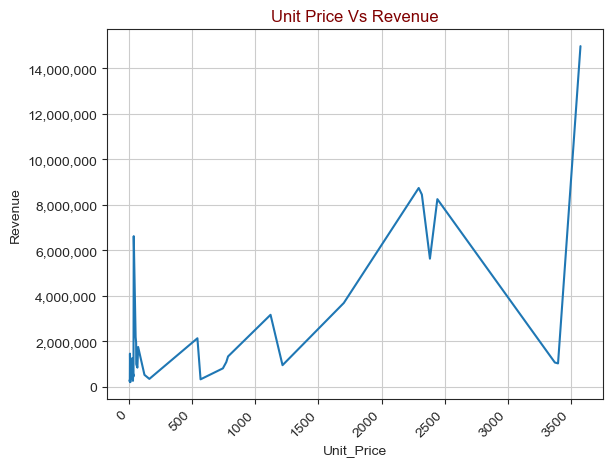

In [459]:
ax=sns.lineplot(data=pr,x="Unit_Price",y="Revenue")
plt.xticks(rotation=45,ha="right")
plt.title("Unit Price Vs Revenue",color="Maroon")
plt.grid()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


# Insight:

1. Revenue Fluctuations with Unit Price

2. The revenue is not linear concerning the unit price.

3. There are multiple peaks and dips, meaning that some high-priced products generate a lot of revenue, while others do not.

4. Low-Price Products:
    At very low unit prices (close to 0), revenue is highly volatile probably due to a large volume of sales.
    Some low-priced products generate significant revenue, while others don’t.

5. Mid-Price Range (500 - 2500):
    Revenue increases as unit price rises but fluctuates. This suggests some mid-range products sell well, while others do not.

6. High-Price Products (Above 3000):
    The last point (above 3500) shows an extremely high revenue spike. This suggests one or a few very expensive products   
    contribute significantly to revenue.

**Note:

1. Not all expensive products generate high revenue.
2. Volume of sales affects revenue more than price alone.
3. There are certain price points where revenue spikes—potential pricing strategy insight.
4. The final large spike (at 3500+) could be an outlier or a premium product driving most of the revenue.